#Prediction of Airline Passangers Satisfaction

#About Project

This dataset contains an airline passenger satisfaction survey. What factors are highly correlated to a satisfied (or dissatisfied) passenger? Can predict passenger satisfaction?.
The objective or goal of this project is to guide an airlines company to determine the important factors that influences the customer or passenger dissatisfaction.
Customer satisfaction plays a major role in affecting the business of a company therefore analysing and improving the factors that are closely related to customer satisfaction is important for the growth and reputation of a company.


In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import BaggingClassifier,RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, f1_score, precision_score, roc_auc_score, recall_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
#airline data
df = pd.read_csv('airline.csv')
df.head()

,Unnamed: 0,id,Gender,Customer_Type,Age,Type_of_Travel,Class,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,...,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied


In [3]:
#general dataframe information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 25 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Unnamed: 0                         103904 non-null  int64  
 1   id                                 103904 non-null  int64  
 2   Gender                             103904 non-null  object 
 3   Customer_Type                      103904 non-null  object 
 4   Age                                103904 non-null  int64  
 5   Type_of_Travel                     103904 non-null  object 
 6   Class                              103904 non-null  object 
 7   Flight_Distance                    103904 non-null  int64  
 8   Inflight_wifi_service              103904 non-null  int64  
 9   Departure/Arrival_time_convenient  103904 non-null  int64  
 10  Ease_of_Online booking             103904 non-null  int64  
 11  Gate_location                      1039

Observation
  1. The data contains 103,904 with 25 columns.
  2. All data types seem to correspond to their column names.


In [4]:
#missing value check
df.isnull().sum()

Unnamed: 0                             0
id                                     0
Gender                                 0
Customer_Type                          0
Age                                    0
Type_of_Travel                         0
Class                                  0
Flight_Distance                        0
Inflight_wifi_service                  0
Departure/Arrival_time_convenient      0
Ease_of_Online booking                 0
Gate_location                          0
Food_and_drink                         0
Online_boarding                        0
Seat_comfort                           0
Inflight_entertainment                 0
On-board_service                       0
Leg_room_service                       0
Baggage_handling                       0
Checkin_service                        0
Inflight_service                       0
Cleanliness                            0
Departure_Delay_in_Minutes             0
Arrival_Delay_in_Minutes             310
satisfaction    

There is a missing value in the 'Arrival_Delay_in_Minutes' column of 310.


In [5]:
#duplicated rows check
df.duplicated().sum()

0

#Data Cleaning

In [6]:
#drop missing value
df=df.dropna(how ='any')

In [7]:
#drop kolom Unnamed:0 dan id
df= df.drop(['Unnamed: 0', 'id'], axis = 1)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103594 entries, 0 to 103903
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             103594 non-null  object 
 1   Customer_Type                      103594 non-null  object 
 2   Age                                103594 non-null  int64  
 3   Type_of_Travel                     103594 non-null  object 
 4   Class                              103594 non-null  object 
 5   Flight_Distance                    103594 non-null  int64  
 6   Inflight_wifi_service              103594 non-null  int64  
 7   Departure/Arrival_time_convenient  103594 non-null  int64  
 8   Ease_of_Online booking             103594 non-null  int64  
 9   Gate_location                      103594 non-null  int64  
 10  Food_and_drink                     103594 non-null  int64  
 11  Online_boarding                    1035

#Descriptive Statistics



In [9]:
# divide the column names based on their types
numericals = df.select_dtypes(include=['int64','float64']).columns.tolist()
categoricals = df.select_dtypes(exclude=['int64','float64']).columns.tolist()

print(f"numericals columns are {numericals}")
print(f"categoricals columns are {categoricals}")

numericals columns are ['Age', 'Flight_Distance', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes']
categoricals columns are ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction']


In [10]:
# numerical variable stats summary
df[numericals].describe()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
count,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000,103594.000000
mean,39.380466,1189.325202,2.729753,3.060081,2.756984,2.977026,3.202126,3.250497,3.439765,3.358341,3.382609,3.351401,3.631687,3.304323,3.640761,3.286397,14.747939,15.178678
std,15.113125,997.297235,1.327866,1.525233,1.398934,1.277723,1.329401,1.349433,1.318896,1.333030,1.288284,1.315409,1.181051,1.265396,1.175603,1.312194,38.116737,38.698682
min,7.000000,31.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,27.000000,414.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000
50%,40.000000,842.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000
75%,51.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000
max,85.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000


Observation
  1. The entire value of min-max looks rational.
  2. Columns Flight_Distance', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness' maybe is discrete, will be check further.
  3. Numerical variables have a far median mean value, it looks like the distribution is not symmetrical.


In [11]:
# inspect discrete columns
for col in numericals:
  print(f'Distinct values for column {col} are')
  print(df[col].value_counts())
  print("---"*20)

Distinct values for column Age are
39    2961
25    2790
40    2569
44    2479
42    2453
      ... 
74      47
76      45
79      42
78      33
85      17
Name: Age, Length: 75, dtype: int64
------------------------------------------------------------
Distinct values for column Flight_Distance are
337     659
594     395
404     391
862     368
2475    367
       ... 
76        1
1305      1
877       1
732       1
400       1
Name: Flight_Distance, Length: 3802, dtype: int64
------------------------------------------------------------
Distinct values for column Inflight_wifi_service are
3    25789
2    25755
4    19737
1    17781
5    11436
0     3096
Name: Inflight_wifi_service, dtype: int64
------------------------------------------------------------
Distinct values for column Departure/Arrival_time_convenient are
4    25474
5    22333
3    17903
2    17142
1    15452
0     5290
Name: Departure/Arrival_time_convenient, dtype: int64
--------------------------------------------------

Column Flight_Distance', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness' adalah `Discrete Column` or categorical.

In [12]:
# categorical variables stats summary
df[categoricals].describe()

,Gender,Customer_Type,Type_of_Travel,Class,satisfaction
count,103594,103594,103594,103594,103594
unique,2,2,2,3,2
top,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
freq,52576,84662,71465,49533,58697


In [13]:
# frequency details for each column
for col in categoricals:
  print(f"Value counts for column {col}:")
  print(df[col].value_counts())
  print("---"*10)
  print("\n")

Value counts for column Gender:
Female    52576
Male      51018
Name: Gender, dtype: int64
------------------------------


Value counts for column Customer_Type:
Loyal Customer       84662
disloyal Customer    18932
Name: Customer_Type, dtype: int64
------------------------------


Value counts for column Type_of_Travel:
Business travel    71465
Personal Travel    32129
Name: Type_of_Travel, dtype: int64
------------------------------


Value counts for column Class:
Business    49533
Eco         46593
Eco Plus     7468
Name: Class, dtype: int64
------------------------------


Value counts for column satisfaction:
neutral or dissatisfied    58697
satisfied                  44897
Name: satisfaction, dtype: int64
------------------------------




#EDA


##Univariate Analysis

In [14]:
categoricals = ['Gender', 'Customer_Type', 'Type_of_Travel', 'Class', 'satisfaction', 'Inflight_wifi_service', 'Departure/Arrival_time_convenient', 'Ease_of_Online booking', 'Gate_location', 'Food_and_drink', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment', 'On-board_service', 'Leg_room_service', 'Baggage_handling', 'Checkin_service', 'Inflight_service', 'Cleanliness' ]

numericals = ['Age', 'Departure_Delay_in_Minutes', 'Arrival_Delay_in_Minutes','Flight_Distance']

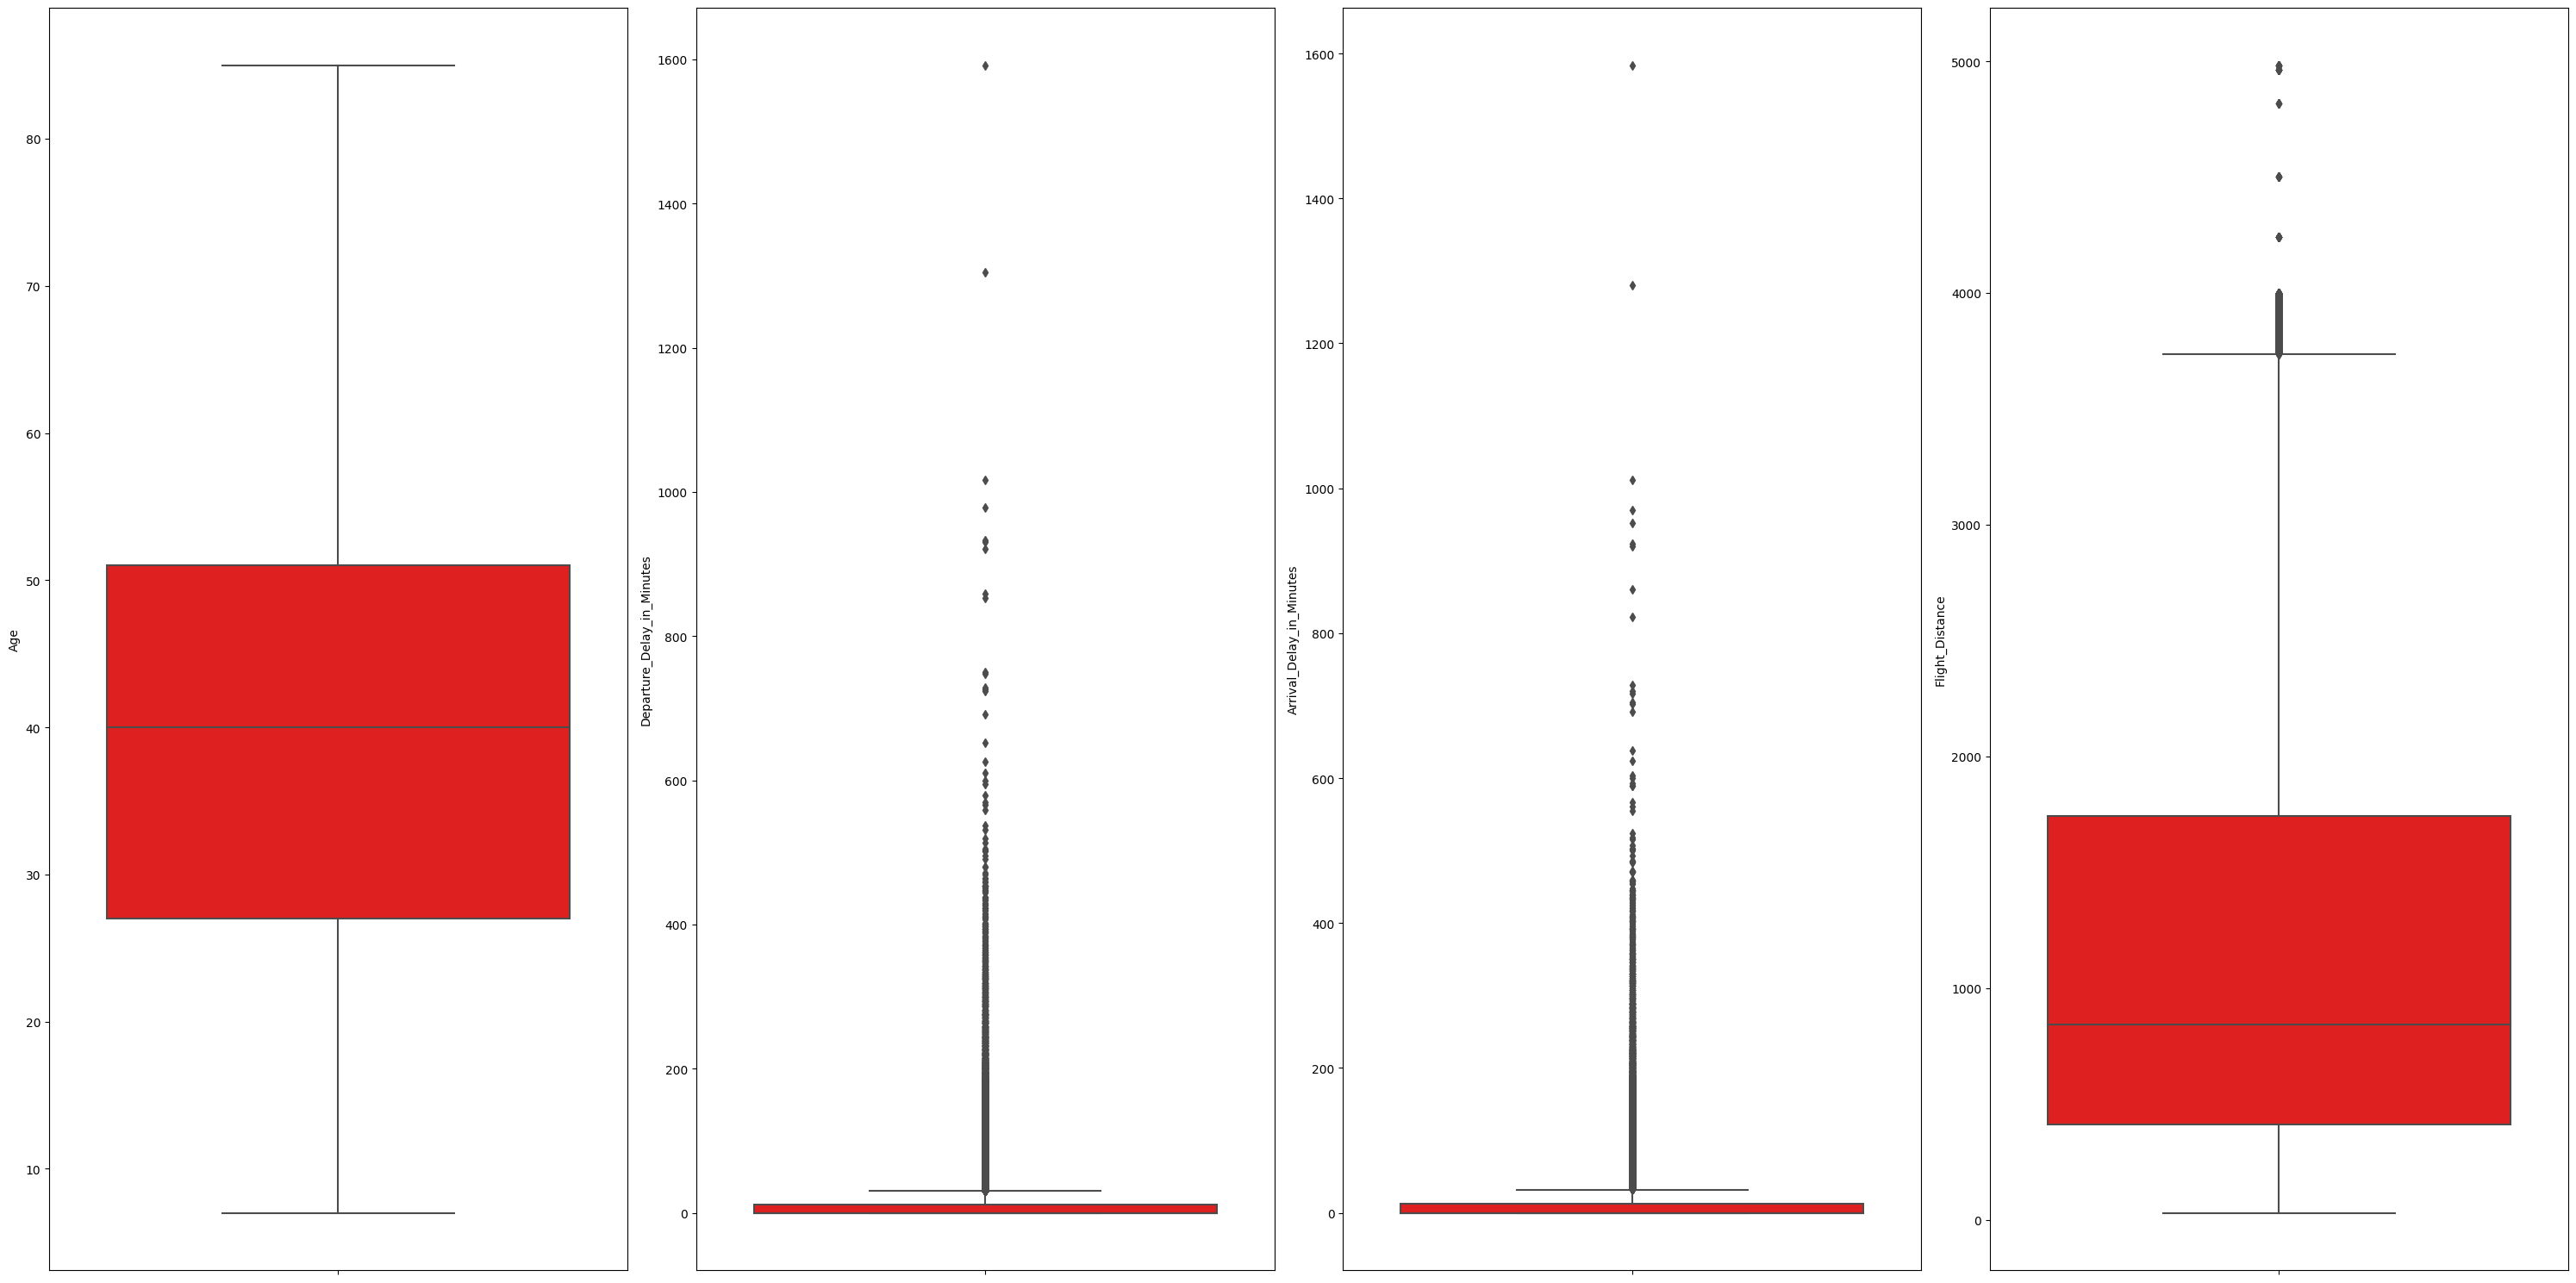

In [15]:
# adjust the figure size for better readability
plt.figure(figsize=(30,15))

# plotting
features = numericals
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df[features[i]], color='red')
    plt.tight_layout()

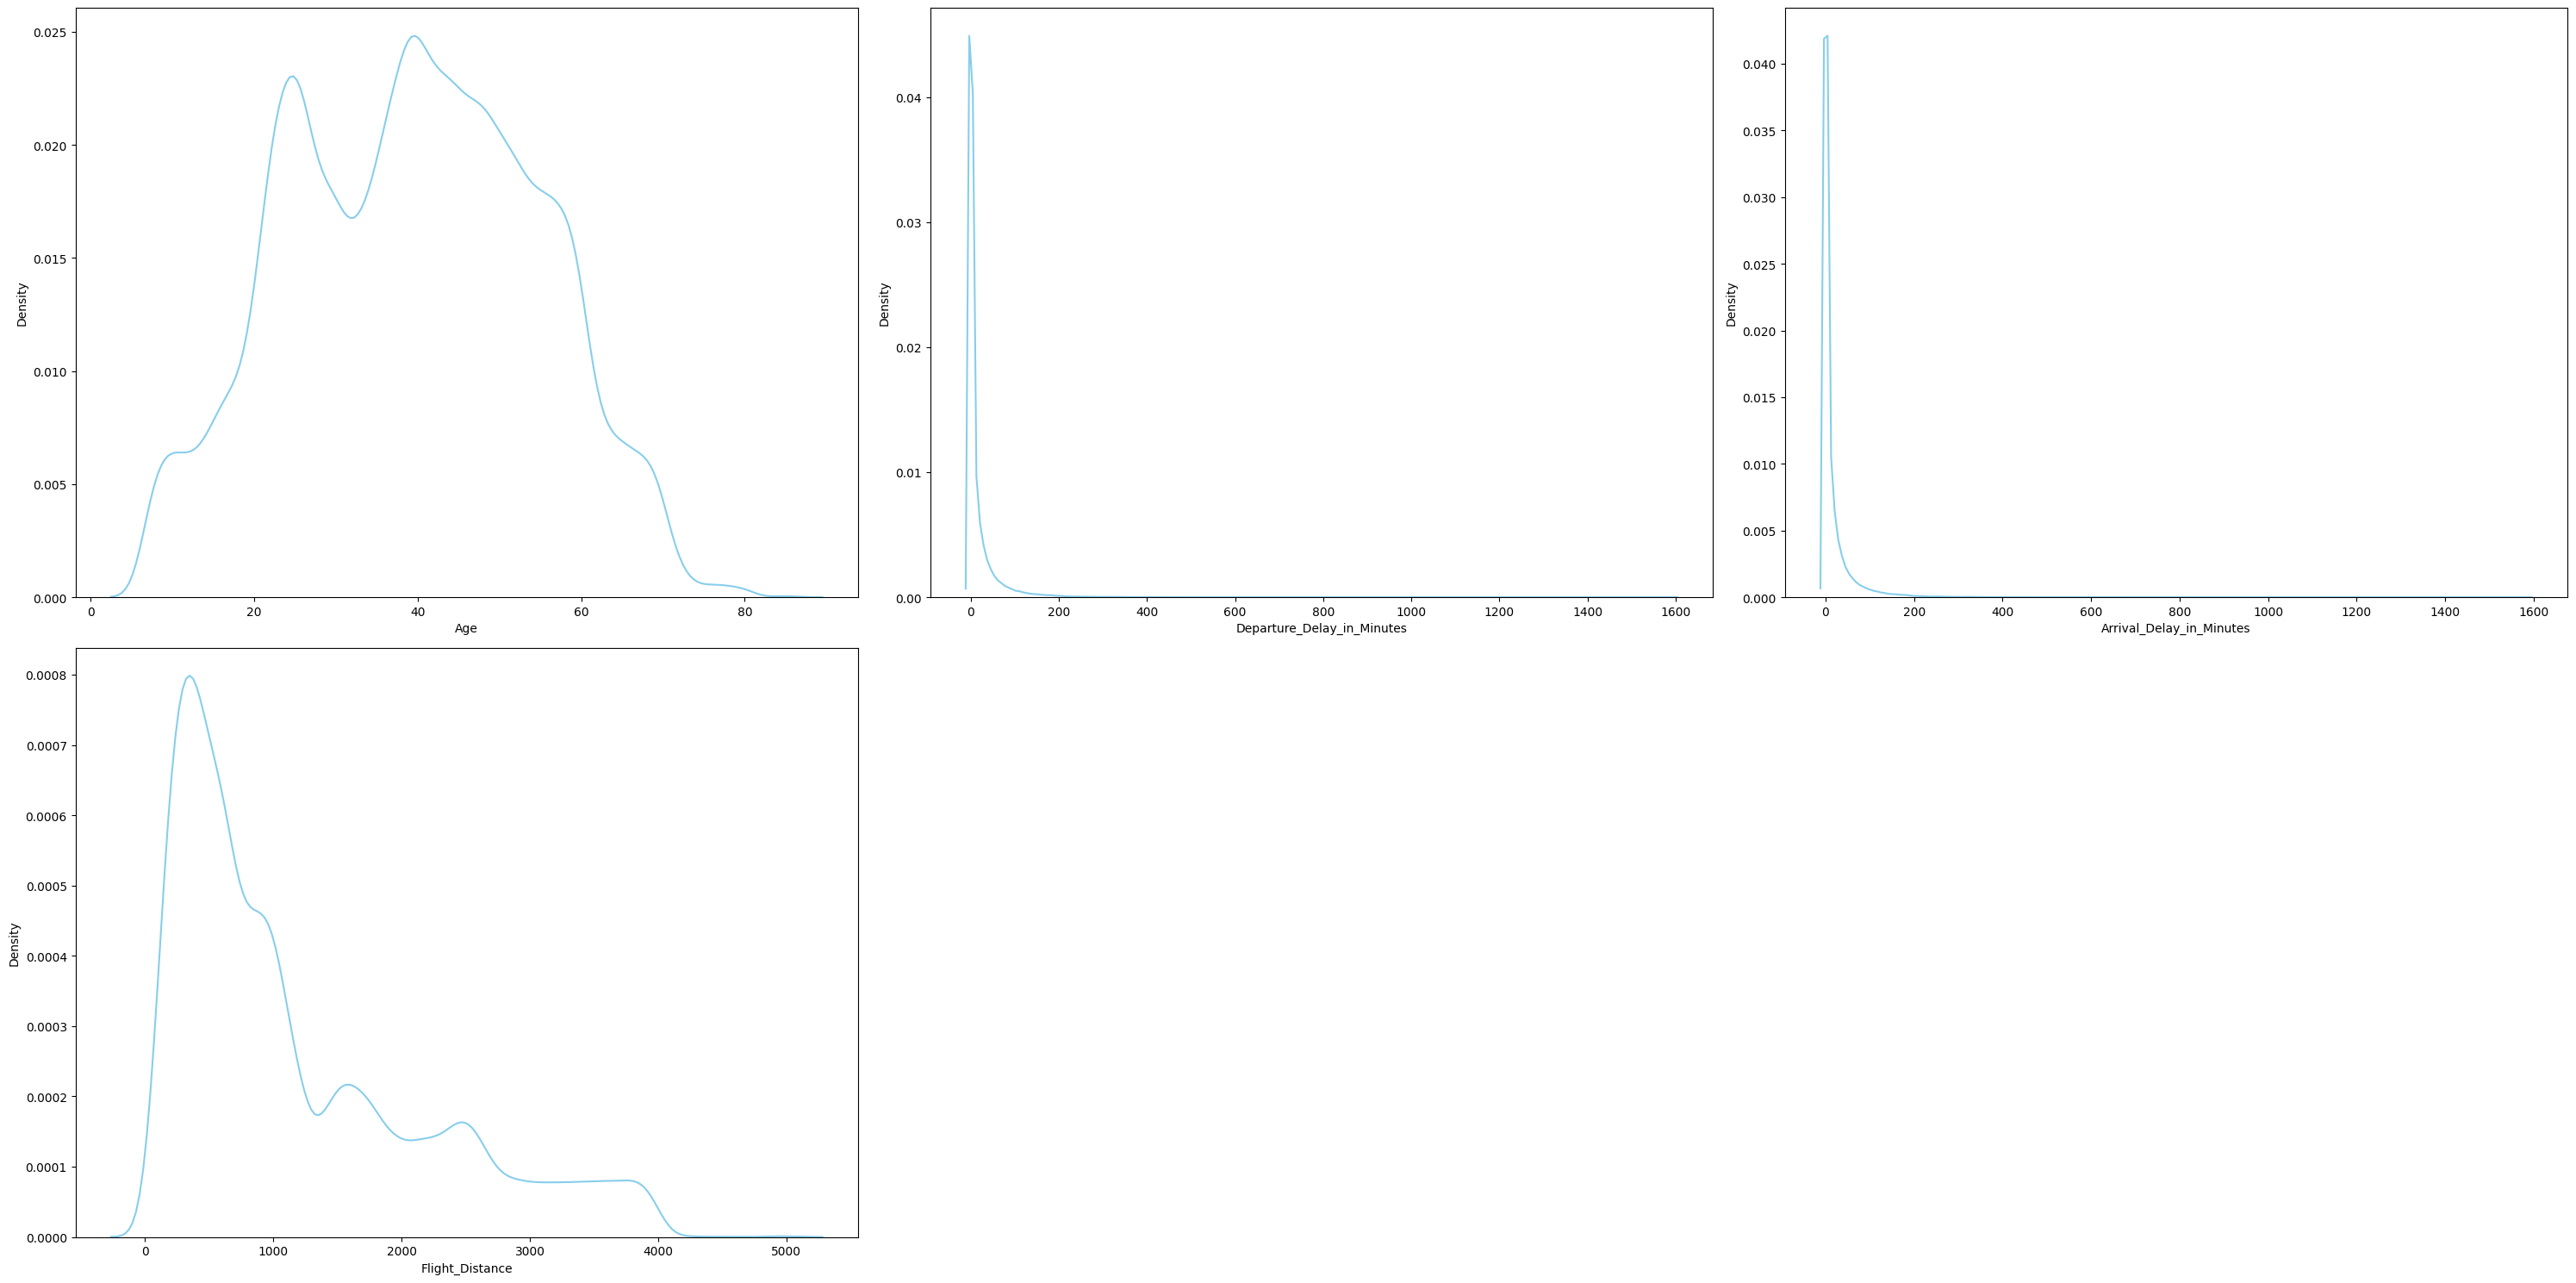

In [16]:
# adjust the figure size for better readability
plt.figure(figsize=(30,15))

features = numericals
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    sns.kdeplot(x=df[features[i]], color='skyblue')
    plt.xlabel(features[i])
    plt.tight_layout()

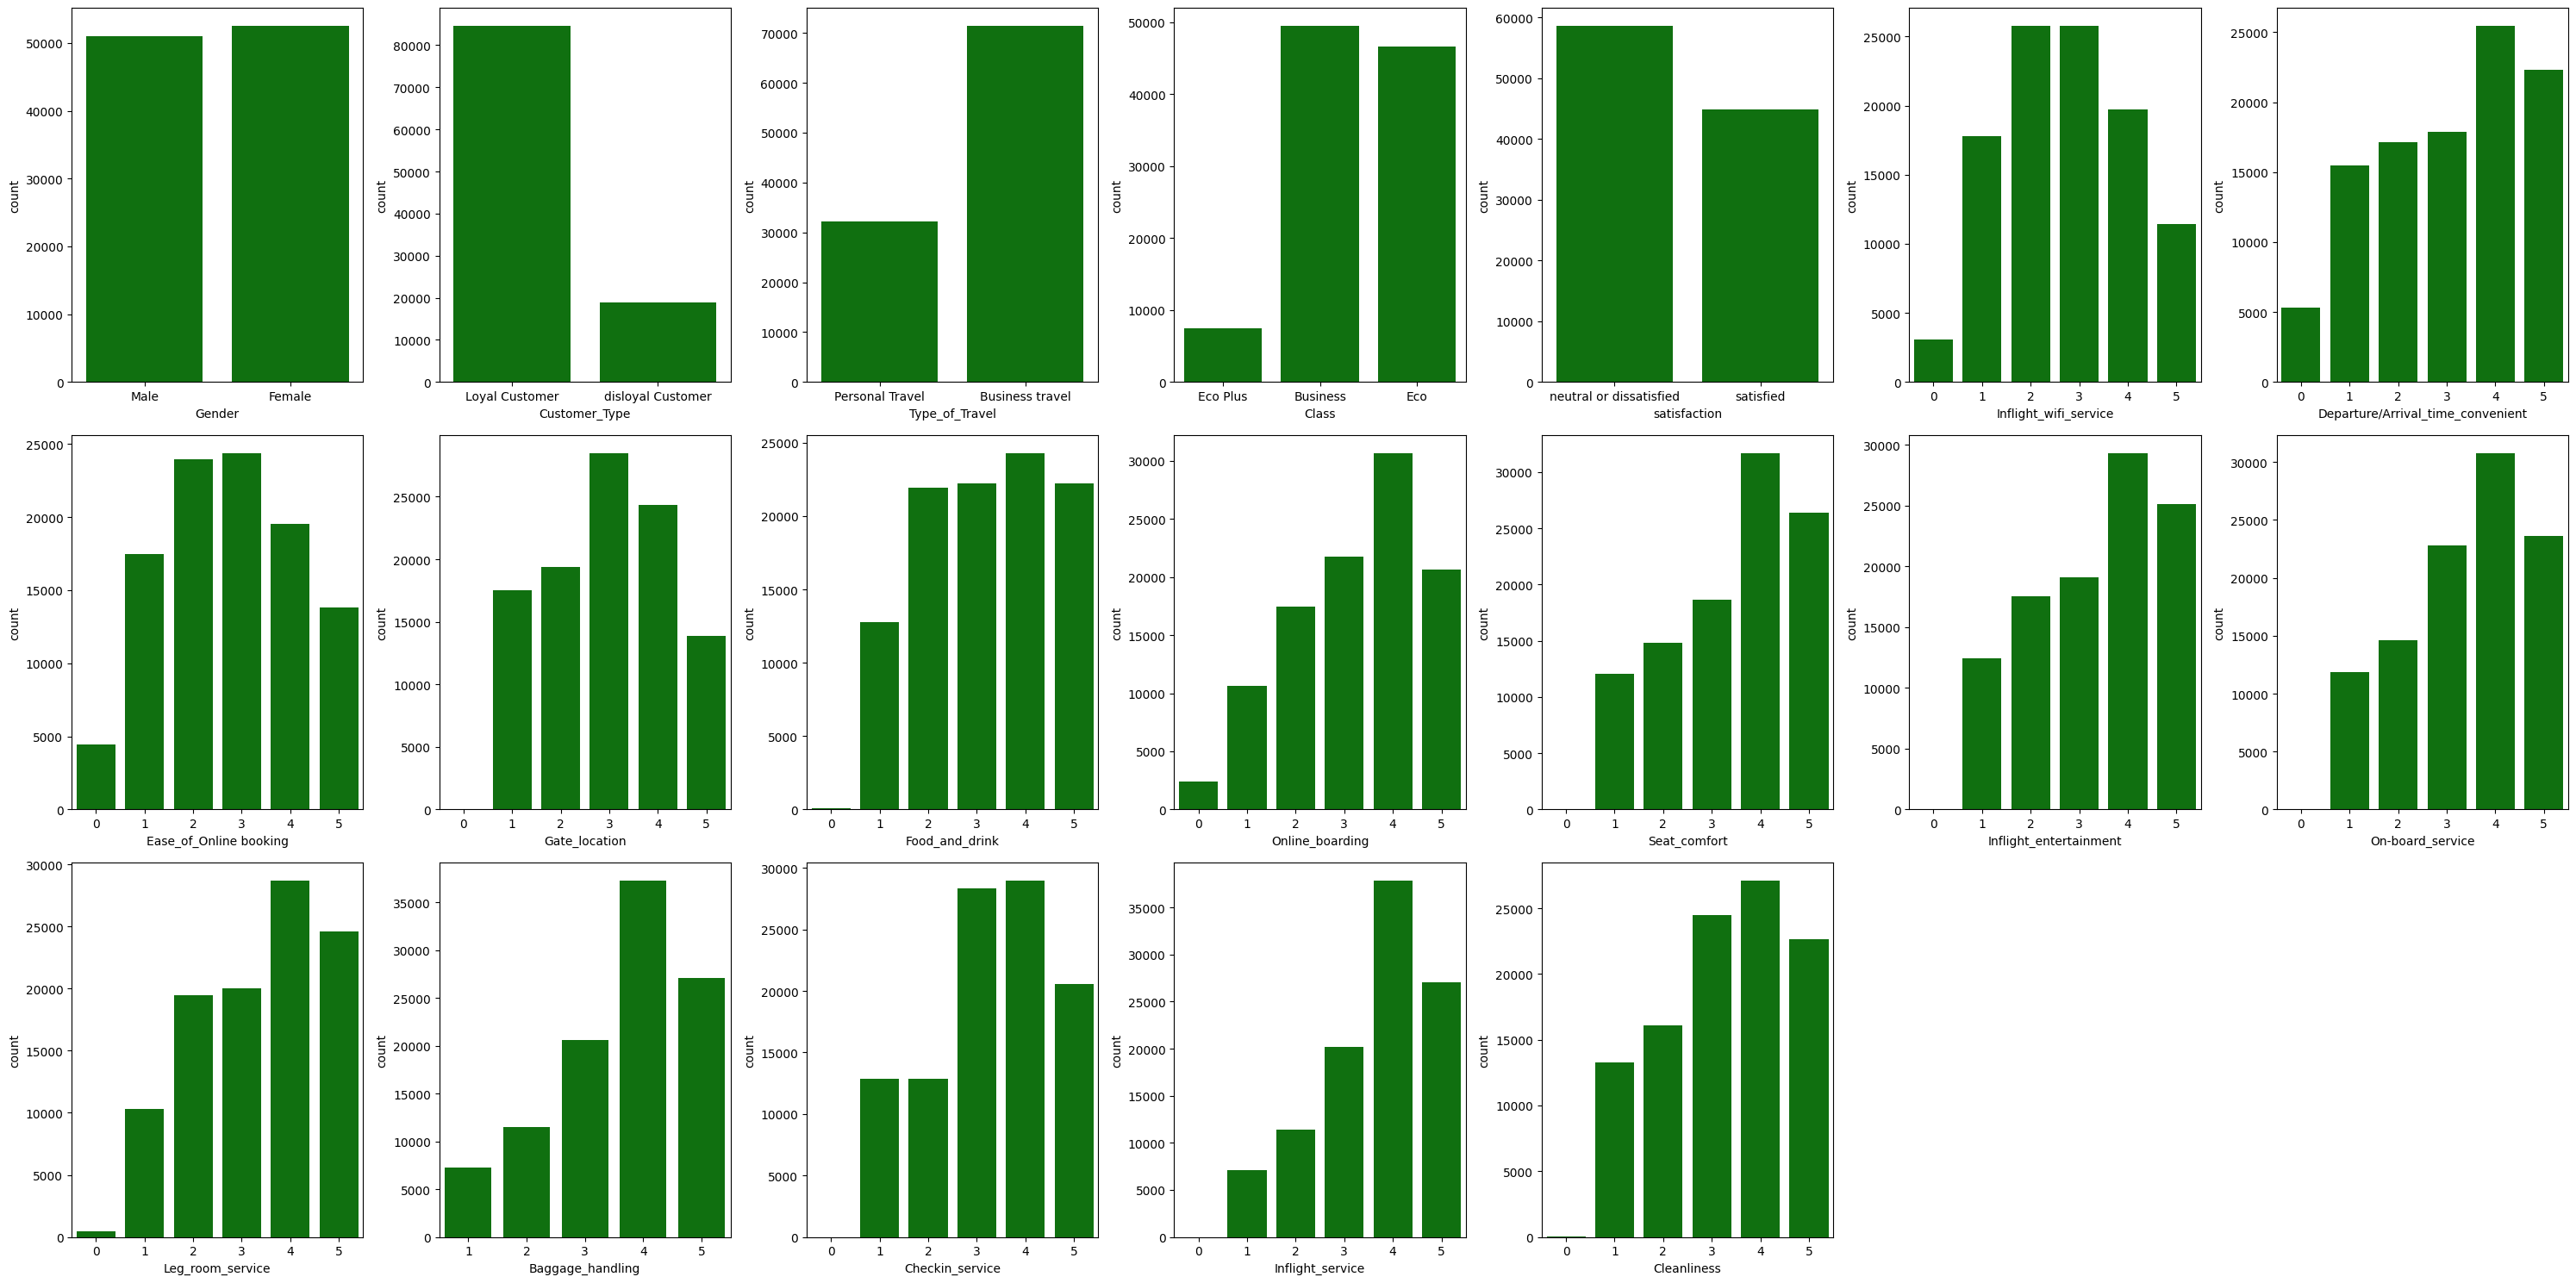

In [17]:
# countplot for categorical columns
plt.figure(figsize=(30,15))

features = categoricals
for i in np.arange(1, len(features)+1):
    plt.subplot(3, len(features)//3+1, i)
    sns.countplot(x=df[features[i-1]], color='green')
    plt.xlabel(features[i-1])
    plt.tight_layout()

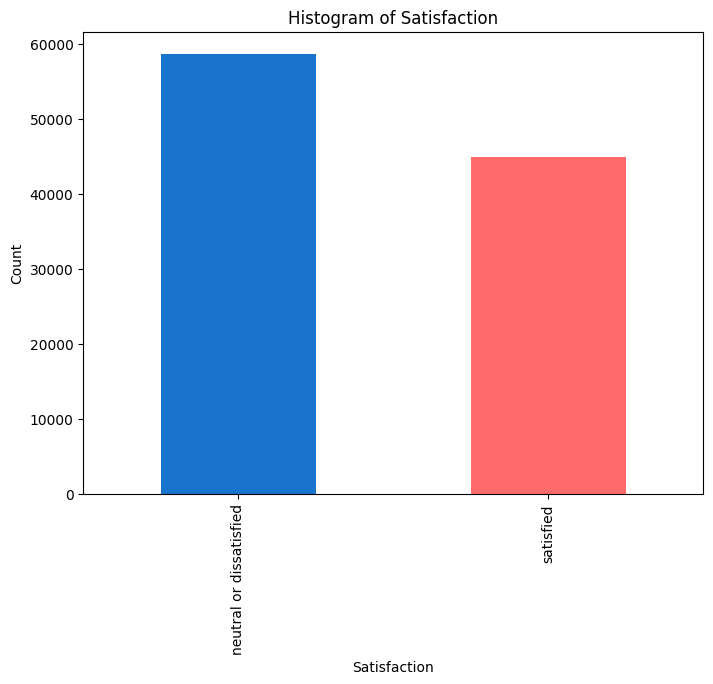

Percentage of satisfaction composition :
neutral or dissatisfied    56.660617
satisfied                  43.339383
Name: satisfaction, dtype: float64


In [18]:
plt.figure(figsize=(8, 6))
df['satisfaction'].value_counts().plot(kind='bar', color=['#1874CD', '#FF6A6A'])
plt.title('Histogram of Satisfaction')
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.show()

#Calculating the Percentage of Composition
satisfaction_percentage = df['satisfaction'].value_counts(normalize=True) * 100
print("Percentage of satisfaction composition :")
print(satisfaction_percentage)

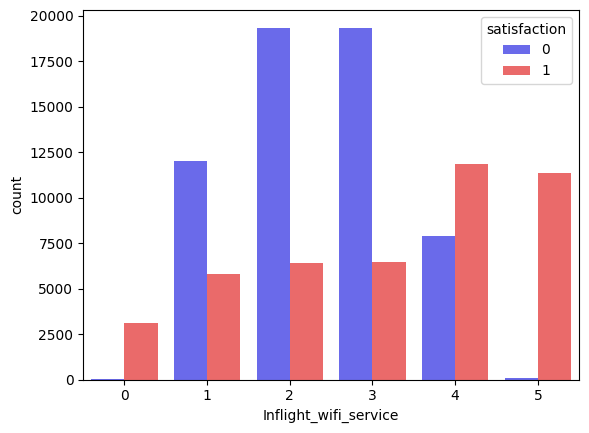

In [89]:
sns.countplot(data=df, x = 'Inflight_wifi_service', hue =df['satisfaction'], palette='seismic')
plt.show()

##Multivariate Analysis

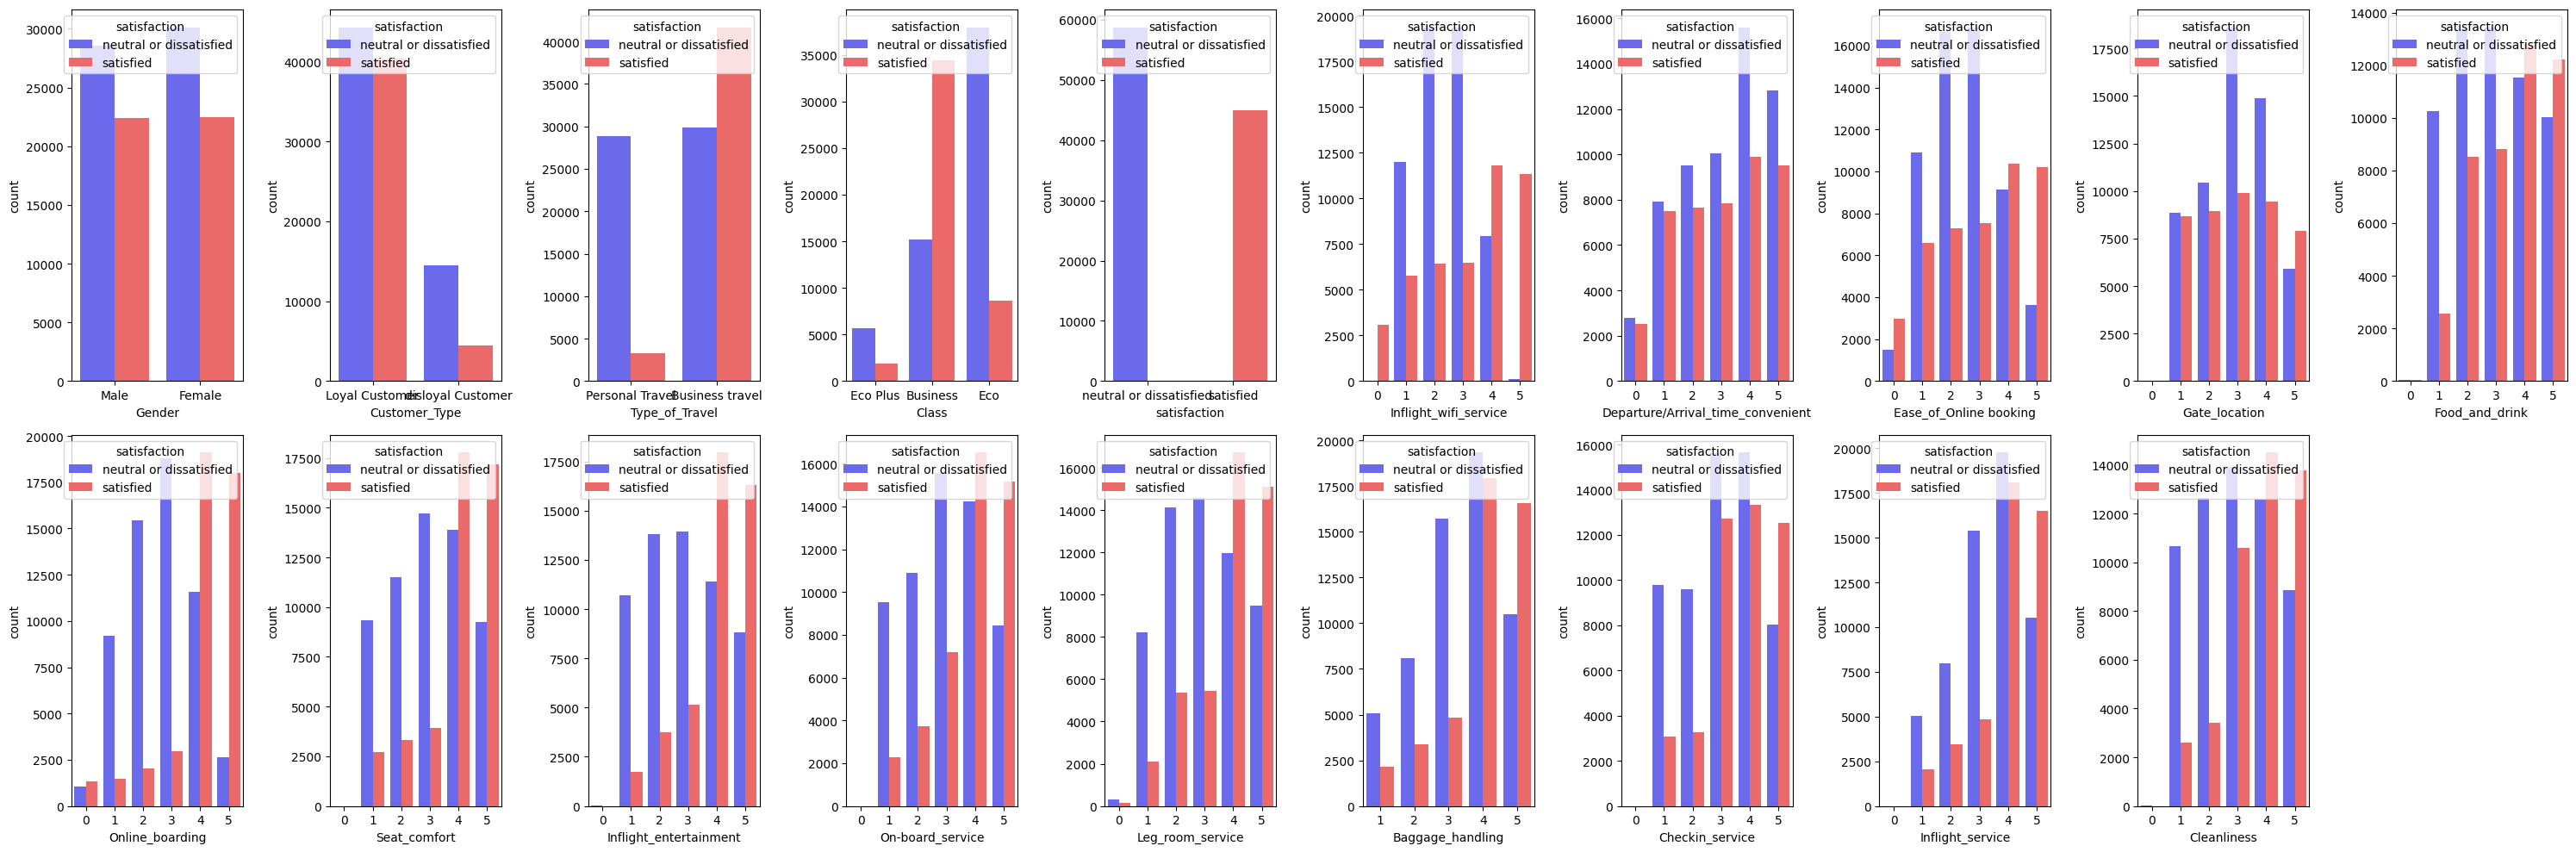

In [19]:
# set target variable (satisfaction) as hue (breakdown basis)
# to understand the different behaviors of each of the features based on satisfaction value

# categorical features))
plt.figure(figsize=(30,10))

features = categoricals
for i in np.arange(1, len(features)+1):
    plt.subplot(2, len(features)//2+1, i)
    sns.countplot(x=df[features[i-1]], hue=df['satisfaction'], palette='seismic')
    plt.xlabel(features[i-1])
    plt.tight_layout()

Observation
  1. Passengers with business travel purposes are more satisfied than passengers with private travel purposes.
  2. Business Class passengers are more satisfied than eco and eco plus passengers.
  3. In the `Inflight_wifi_service` and `Ease_of_Online booking` features, the majority of passengers expressed dissatisfaction rather than satisfaction.
  4.  More than 80% of passengers flying in `Eco Class` are either Neutral or Dissatisfied. That shows us that it needs some impromevent.


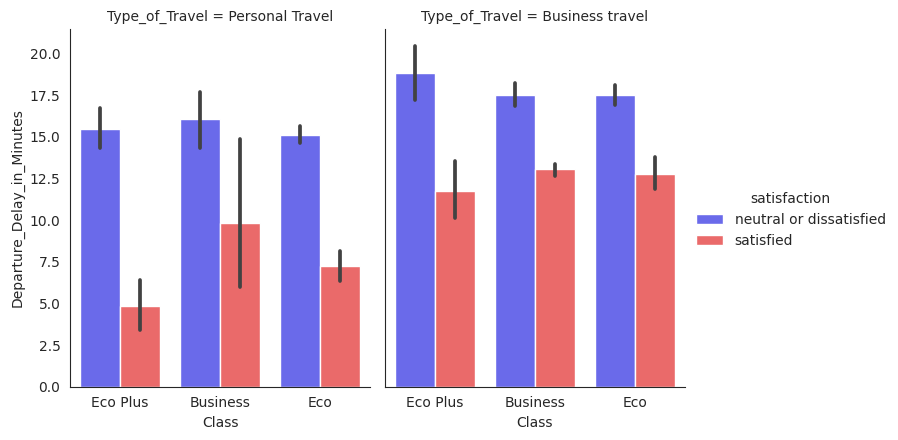

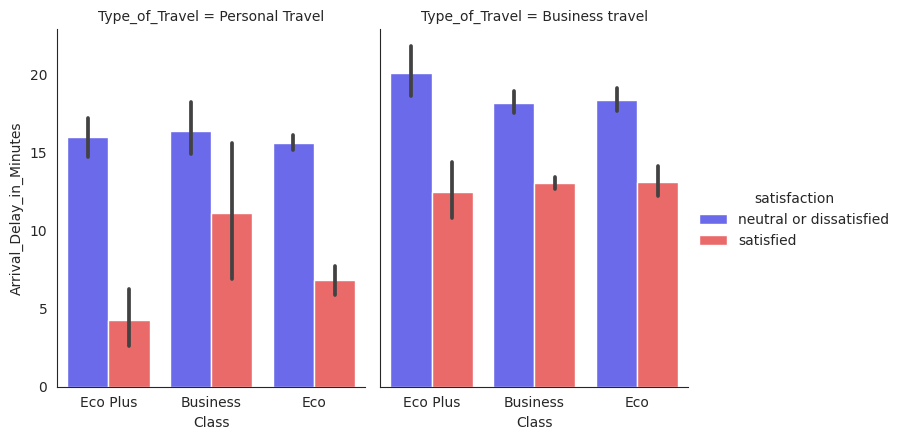

In [20]:
#Departure/Arrival_Delay_in_Minutes, Type_of_travel by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=df, kind="bar", height=4.5, aspect=.8,palette="seismic")
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=df, kind="bar", height=4.5, aspect=.8,palette="seismic")

The provided information means that, specifically for personal travel, especially in the Eco Plus and Eco classes, there is a substantial increase in the number of dissatisfied passengers when the arrival delay in minutes is high. This outcome is described as "quite obvious." Additionally, when comparing delays on a minute-by-minute basis (presumably for both departure and arrival), it is stated that, in general, all combinations result in a higher number of dissatisfied passengers compared to satisfied passengers. This suggests a pervasive trend where passengers tend to be more dissatisfied than satisfied with delays, regardless of the specific details of those delays.

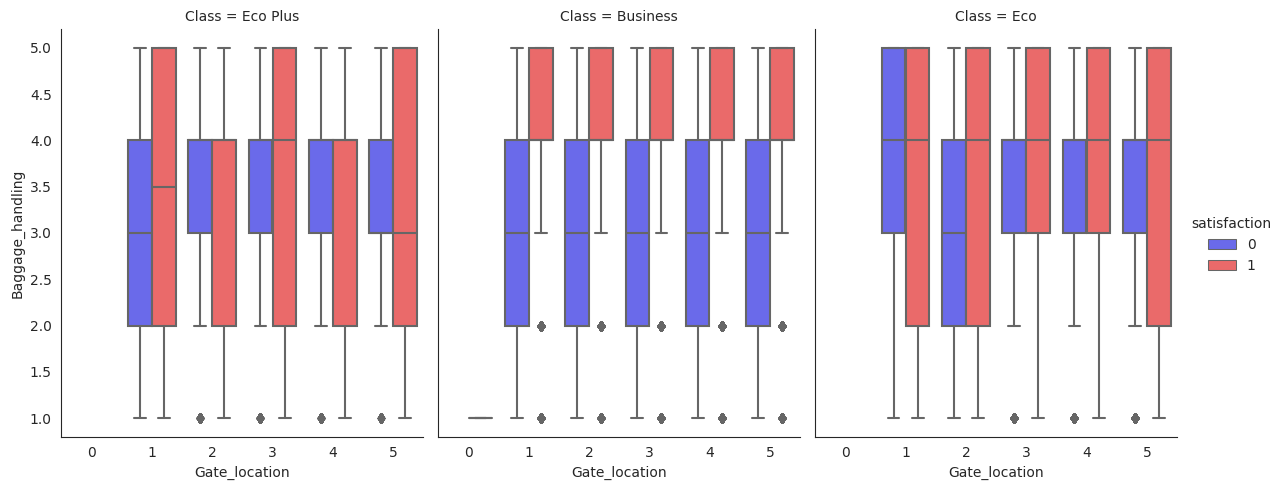

In [49]:
#Gate_location, Baggage_handling by Class
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=df, kind="box", height=5, aspect=.8,palette="seismic")

 The information provided seems to describe the relationship between baggage handling, gate locations, and passenger satisfaction in different classes.

1. Business Class:
  - There is a noticeable trend that all gate locations result in higher numbers of dissatisfied passengers when baggage handling is not done perfectly well (rating <= 4).
  - This suggests that for Business class passengers, the dissatisfaction is consistently high across all gate locations when there are issues with baggage handling.

2. Eco Plus:
  - Specifically, when the gate location is 1, Eco Plus passengers remain dissatisfied even when the baggage handling is in a mediocre range (rating in the range 2.0 - 4.0).
  - This implies that for Eco Plus passengers, the gate location is a critical factor, and even if baggage handling is not perfect but falls within a certain range, it doesn't guarantee satisfaction, especially when the gate location is 1.
3. Eco:
  - Similarly, for Eco passengers, when the gate location is 2, even with mediocre baggage handling (rating in the range 2.0 - 4.0), passengers are dissatisfied.
  - This indicates that, like Eco Plus, Eco passengers are sensitive to the gate location, and it significantly affects their satisfaction, even if baggage handling is not perfect.

In summary:
- Business class passengers are generally dissatisfied when baggage handling is not done perfectly well, regardless of gate location.
- Eco Plus passengers are particularly dissatisfied when the gate location is 1, even with mediocre baggage handling.
- Eco passengers are particularly dissatisfied when the gate location is 2, even with mediocre baggage handling.

Understanding these patterns can help improve service quality and prioritize specific aspects (such as baggage handling and gate location) to enhance passenger satisfaction in each class.

#Data Preprocessing

In [23]:
df.dtypes

Gender                                object
Customer_Type                         object
Age                                    int64
Type_of_Travel                        object
Class                                 object
Flight_Distance                        int64
Inflight_wifi_service                  int64
Departure/Arrival_time_convenient      int64
Ease_of_Online booking                 int64
Gate_location                          int64
Food_and_drink                         int64
Online_boarding                        int64
Seat_comfort                           int64
Inflight_entertainment                 int64
On-board_service                       int64
Leg_room_service                       int64
Baggage_handling                       int64
Checkin_service                        int64
Inflight_service                       int64
Cleanliness                            int64
Departure_Delay_in_Minutes             int64
Arrival_Delay_in_Minutes             float64
satisfacti

In [24]:
df_num = df.select_dtypes(include='number')
df_num.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,13,460,3,4,3,1,5,3,5,5,4,3,4,4,5,5,25,18.0
1,25,235,3,2,3,3,1,3,1,1,1,5,3,1,4,1,1,6.0
2,26,1142,2,2,2,2,5,5,5,5,4,3,4,4,4,5,0,0.0
3,25,562,2,5,5,5,2,2,2,2,2,5,3,1,4,2,11,9.0
4,61,214,3,3,3,3,4,5,5,3,3,4,4,3,3,3,0,0.0


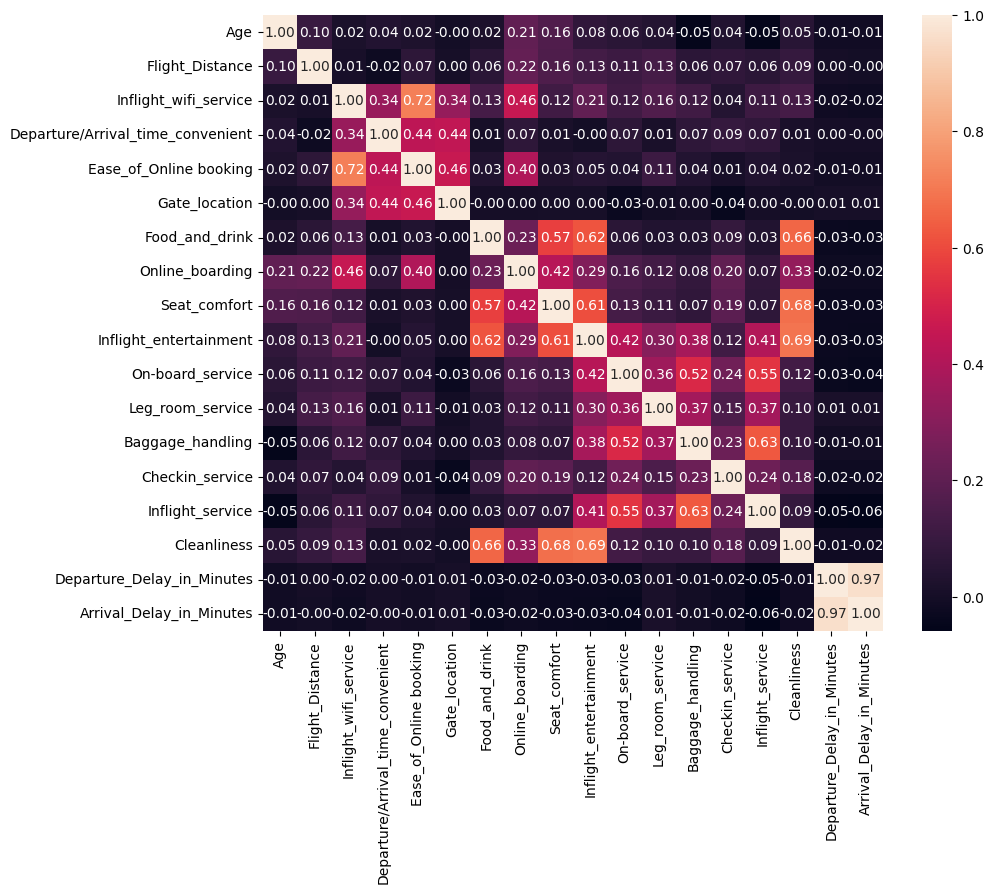

In [25]:
# heatmap correlation
plt.figure(figsize=(10,8))
correlation = df_num.corr()
sns.heatmap(correlation, annot=True, fmt='.2f')
plt.show()

There is a multicollinearity between `Arrival_Delay_in_Minutes` and `Departure_Delay_in_Minutes` but its not dropped because these two variables affect the level of passenger satisfaction.

In [26]:
df['satisfaction'].replace({'neutral or dissatisfied': 0, 'satisfied': 1},inplace = True)

In [27]:
X = df.drop(columns=['satisfaction'])
y=df.satisfaction

In [28]:
X_num = X.select_dtypes('number')
X_cat = X.select_dtypes('object')

In [29]:
scaler = MinMaxScaler()
X_num_scaled = scaler.fit_transform(X_num)

In [30]:
# Convert the scaled numpy array back to a DataFrame
X_num_scaled = pd.DataFrame(X_num_scaled, columns=X_num.columns, index=X_num.index)
X_num_scaled.head()

,Age,Flight_Distance,Inflight_wifi_service,Departure/Arrival_time_convenient,Ease_of_Online booking,Gate_location,Food_and_drink,Online_boarding,Seat_comfort,Inflight_entertainment,On-board_service,Leg_room_service,Baggage_handling,Checkin_service,Inflight_service,Cleanliness,Departure_Delay_in_Minutes,Arrival_Delay_in_Minutes
0,0.076923,0.086632,0.6,0.8,0.6,0.2,1.0,0.6,1.0,1.0,0.8,0.6,0.75,0.8,1.0,1.0,0.015704,0.011364
1,0.230769,0.041195,0.6,0.4,0.6,0.6,0.2,0.6,0.2,0.2,0.2,1.0,0.50,0.2,0.8,0.2,0.000628,0.003788
2,0.243590,0.224354,0.4,0.4,0.4,0.4,1.0,1.0,1.0,1.0,0.8,0.6,0.75,0.8,0.8,1.0,0.000000,0.000000
3,0.230769,0.107229,0.4,1.0,1.0,1.0,0.4,0.4,0.4,0.4,0.4,1.0,0.50,0.2,0.8,0.4,0.006910,0.005682
4,0.692308,0.036955,0.6,0.6,0.6,0.6,0.8,1.0,1.0,0.6,0.6,0.8,0.75,0.6,0.6,0.6,0.000000,0.000000


In [31]:
X_cat_encoded = pd.get_dummies(X_cat, drop_first=False, dtype=int)
X_cat_encoded.head()

,Gender_Female,Gender_Male,Customer_Type_Loyal Customer,Customer_Type_disloyal Customer,Type_of_Travel_Business travel,Type_of_Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,0,1,1,0,0,1,0,0,1
1,0,1,0,1,1,0,1,0,0
2,1,0,1,0,1,0,1,0,0
3,1,0,1,0,1,0,1,0,0
4,0,1,1,0,1,0,1,0,0


In [32]:
X = pd.concat([X_num_scaled, X_cat_encoded], axis=1)

In [33]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

#Modelling and Evaluation

##KNN


In [34]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier().fit(X_train, y_train)

###Training

In [35]:
y_train_pred = knn.predict(X_train)
print('Classification Report Training Model KNN :')
print(classification_report(y_train, y_train_pred, digits=5))

Classification Report Training Model KNN :
              precision    recall  f1-score   support

           0    0.93372   0.97757   0.95514     41114
           1    0.96871   0.90914   0.93798     31401

    accuracy                        0.94794     72515
   macro avg    0.95122   0.94336   0.94656     72515
weighted avg    0.94887   0.94794   0.94771     72515



###Testing

Classification Report Testing Model KNN:
              precision    recall  f1-score   support

           0    0.90903   0.96553   0.93643     17583
           1    0.95114   0.87411   0.91100     13496

    accuracy                        0.92583     31079
   macro avg    0.93008   0.91982   0.92372     31079
weighted avg    0.92732   0.92583   0.92539     31079



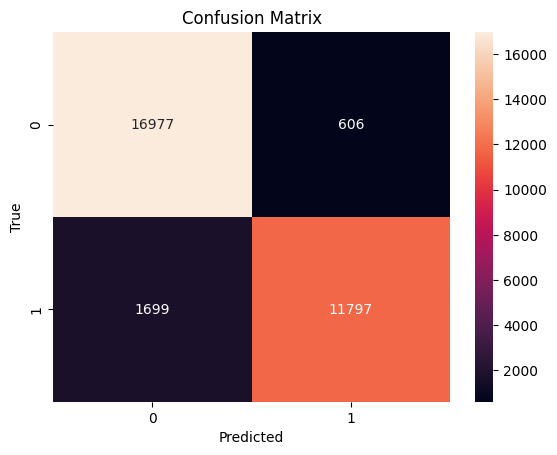

In [36]:
y_test_pred = knn.predict(X_test)
print('Classification Report Testing Model KNN:')
print(classification_report(y_test, y_test_pred, digits=5))
matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');

##Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
log_model = lr.fit(X_train, y_train)

###Training

In [38]:
y_train_pred = log_model.predict(X_train)
print('Classification Report Training Model (Logistic Regression) :')
print(classification_report(y_train, y_train_pred, digits=5))

Classification Report Training Model (Logistic Regression) :
              precision    recall  f1-score   support

           0    0.88047   0.90565   0.89288     41114
           1    0.87166   0.83902   0.85503     31401

    accuracy                        0.87680     72515
   macro avg    0.87607   0.87234   0.87396     72515
weighted avg    0.87666   0.87680   0.87649     72515



###Testing

Classification Report Testing Model (Logistic Regression):
              precision    recall  f1-score   support

           0    0.87469   0.90235   0.88830     17583
           1    0.86731   0.83158   0.84907     13496

    accuracy                        0.87162     31079
   macro avg    0.87100   0.86696   0.86869     31079
weighted avg    0.87149   0.87162   0.87127     31079



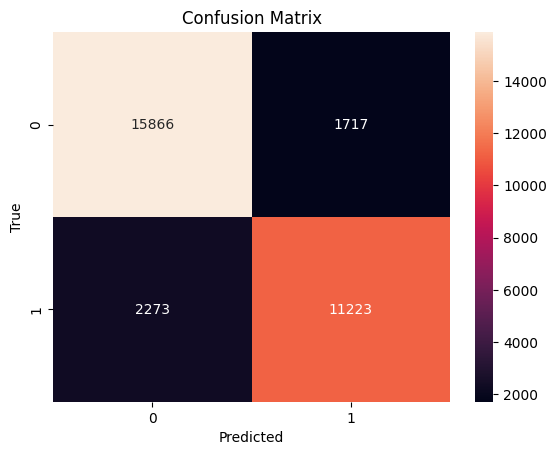

In [39]:
y_test_pred = log_model.predict(X_test)
print('Classification Report Testing Model (Logistic Regression):')
print(classification_report(y_test, y_test_pred, digits=5))
matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');

##Random Forest

In [93]:
from sklearn.ensemble import RandomForestClassifier
rdf_model = RandomForestClassifier().fit(X_train, y_train)

###Training

In [41]:
y_train_pred = rdf_model.predict(X_train)
print('Classification Report Training Model (Random Forest) :')
print(classification_report(y_train, y_train_pred, digits=5))

Classification Report Training Model (Random Forest) :
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     41114
           1    1.00000   1.00000   1.00000     31401

    accuracy                        1.00000     72515
   macro avg    1.00000   1.00000   1.00000     72515
weighted avg    1.00000   1.00000   1.00000     72515



###Testing

Classification Report Testing Model (Random Forest Classifier):
              precision    recall  f1-score   support

           0    0.95539   0.97936   0.96723     17583
           1    0.97219   0.94043   0.95605     13496

    accuracy                        0.96245     31079
   macro avg    0.96379   0.95989   0.96164     31079
weighted avg    0.96269   0.96245   0.96237     31079



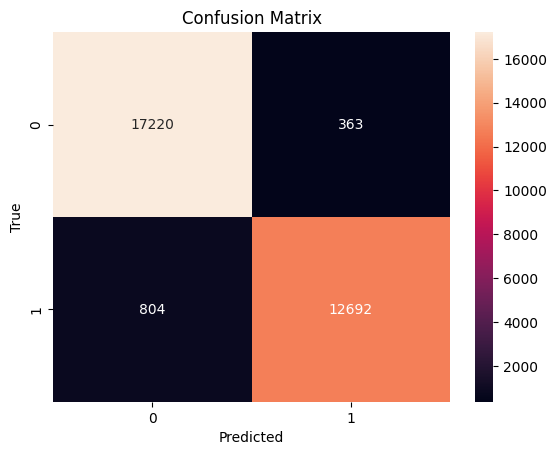

In [42]:
y_test_pred = rdf_model.predict(X_test)
print('Classification Report Testing Model (Random Forest Classifier):')
print(classification_report(y_test, y_test_pred, digits=5))
matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');

##Support Vector Machines


In [43]:
from sklearn.svm import SVC
svm_model=SVC().fit(X_train, y_train)

###Training

In [44]:
y_train_pred = svm_model.predict(X_train)
print('Classification Report Training Model (Support Vector Machines) :')
print(classification_report(y_train, y_train_pred, digits=5))

Classification Report Training Model (Support Vector Machines) :
              precision    recall  f1-score   support

           0    0.94517   0.96174   0.95338     41114
           1    0.94873   0.92695   0.93771     31401

    accuracy                        0.94667     72515
   macro avg    0.94695   0.94434   0.94555     72515
weighted avg    0.94671   0.94667   0.94660     72515



###Testing

Classification Report Testing Model (Support Vector Machines):
              precision    recall  f1-score   support

           0    0.94234   0.96013   0.95115     17583
           1    0.94675   0.92346   0.93496     13496

    accuracy                        0.94421     31079
   macro avg    0.94454   0.94180   0.94306     31079
weighted avg    0.94425   0.94421   0.94412     31079



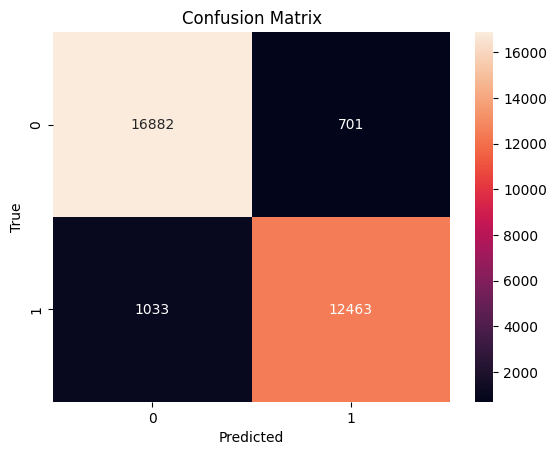

In [45]:
y_test_pred = svm_model.predict(X_test)
print('Classification Report Testing Model (Support Vector Machines):')
print(classification_report(y_test, y_test_pred, digits=5))
matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(matrix, annot=True, fmt="d");
plt.title('Confusion Matrix');
plt.xlabel('Predicted');
plt.ylabel('True');

Among the 4 models above, the model that has the highest accuracy and f1 score is using `Random Forest` with an accuracy value of 96.23% and an f1 score of 95.5%.